<a href="https://colab.research.google.com/github/tskmr/MIP/blob/main/Lec10(2025_6_23)_Trunc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
x = c(0.1, 0.1, 0.15, 0.6, 0.8, 0.8, 1.2, 2.5, 3, 4,
4, 6, 10, 10, 12.5, 20, 20, 43, 43, 48,
48, 54, 74, 84, 94, 168, 263, 593)
tauU = 1370
dU = data.frame(t = x, tauU)

In [54]:
dsev = function(z){
  exp(z-exp(z))
}
psev = function(z){
  1-exp(-exp(z))
}
loglikelihood = function(t, tauL){
  function(par){
    sum(log(L_i(t, tauL, par)))
  }
}
L_i = function(t, tauL, par){
  mu = par[1]
  sigma = par[2]
  (dsev( (log(t)-mu)/sigma ) / ( sigma*t ) )/ psev( (log(tauU)-mu)/sigma )
}


In [44]:
res = optim(
  c(4,3),
  loglikelihood(dU$t, dU$tauU),
  hessian=TRUE,
  control=list(fnscale=-1))
res

-6.541731,-2.366334
-2.366334,-11.606939


In [45]:
hat.theta = res$par
Hn = res$hessian
fisher.information = -Hn
aVar = solve(fisher.information)
hat.theta
diag(aVar)

[1] 3.344786 2.016524

[1] 0.16503554 0.09301489

In [46]:
data.frame(
  lower = hat.theta[1] - qnorm(0.975)*sqrt(aVar[1,1]),
  upper = hat.theta[1] + qnorm(0.975)*sqrt(aVar[1,1])
)
# lower upper
# 2.548559 4.141013
data.frame(
  lower = hat.theta[2] - qnorm(0.975)*sqrt(aVar[2,2]),
  upper = hat.theta[2] + qnorm(0.975)*sqrt(aVar[2,2])
)

lower,upper
<dbl>,<dbl>
2.548559,4.141013


lower,upper
<dbl>,<dbl>
1.418768,2.614281


In [64]:
mu = hat.theta[1]
sigma = hat.theta[2]
Ft = function(t, tauU, par){
  mu = par[1]
  sigma = par[2]
  psev( (log(t)-mu)/sigma )#/ psev((log(tauU)-mu)/sigma)
}

# t = seq(0, 1500, len=100)
t = exp(seq(log(0.01), log(1500), len=100))
tauU
hat.F = Ft(t, tauU, c(mu, sigma))
Jacobian = function(t, mu, sigma, pu, h = 0.00001){
  j1 = (Ft(t, tauU, c(mu-h, sigma)) - Ft(t, tauU, c(mu+h, sigma)))/(2*h)
  j2 = (Ft(t, tauU, c(mu, sigma-h)) - Ft(t, tauU, c(mu, sigma+h)))/(2*h)
  matrix(c(j1, j2), ncol=2)
}
J = Jacobian(t, mu, sigma)
tJ = t(J)
var.F = sapply(1:length(t), function(i) J[i,]%*%aVar%*%tJ[,i])
var.F

[1] 1370

[1] 1.670509e-04 1.830360e-04 2.004608e-04 2.194425e-04 2.401063e-04
  [6] 2.625853e-04 2.870211e-04 3.135637e-04 3.423718e-04 3.736125e-04
 [11] 4.074621e-04 4.441049e-04 4.837339e-04 5.265498e-04 5.727610e-04
 [16] 6.225823e-04 6.762347e-04 7.339436e-04 7.959382e-04 8.624489e-04
 [21] 9.337062e-04 1.009938e-03 1.091367e-03 1.178208e-03 1.270664e-03
 [26] 1.368921e-03 1.473148e-03 1.583487e-03 1.700051e-03 1.822918e-03
 [31] 1.952125e-03 2.087658e-03 2.229451e-03 2.377378e-03 2.531240e-03
 [36] 2.690766e-03 2.855601e-03 3.025304e-03 3.199336e-03 3.377061e-03
 [41] 3.557741e-03 3.740530e-03 3.924479e-03 4.108534e-03 4.291543e-03
 [46] 4.472261e-03 4.649358e-03 4.821436e-03 4.987044e-03 5.144696e-03
 [51] 5.292895e-03 5.430156e-03 5.555037e-03 5.666164e-03 5.762259e-03
 [56] 5.842171e-03 5.904900e-03 5.949617e-03 5.975681e-03 5.982648e-03
 [61] 5.970273e-03 5.938502e-03 5.887456e-03 5.817405e-03 5.728738e-03
 [66] 5.621924e-03 5.497478e-03 5.355926e-03 5.197777e-03 5.023511e-03
 [71] 4.833589e-03 4.628469e-03 4.408667e-03 4.174820e-03 3.927778e-03
 [76] 3.668700e-03 3.399155e-03 3.121199e-03 2.837427e-03 2.550978e-03
 [81] 2.265483e-03 1.984951e-03 1.713596e-03 1.455606e-03 1.214891e-03
 [86] 9.948201e-04 7.979853e-04 6.260240e-04 4.795203e-04 3.580032e-04
 [91] 2.600413e-04 1.834212e-04 1.253853e-04 8.289530e-05 5.288729e-05
 [96] 3.248730e-05 1.916756e-05 1.083438e-05 5.851368e-06 3.010875e-06

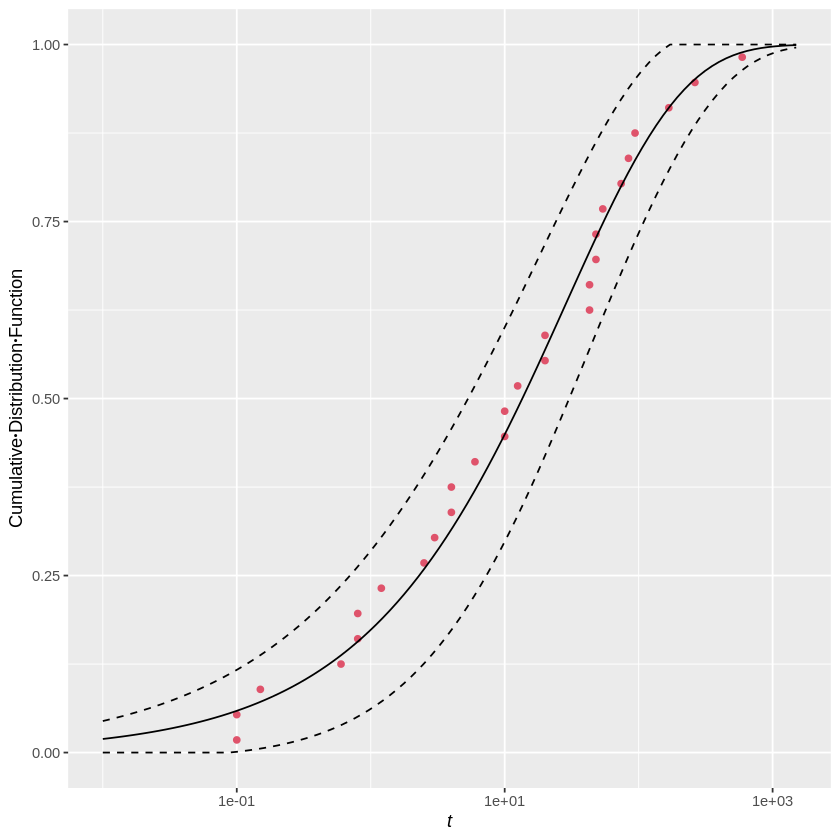

In [65]:
library(tidyverse)
dFT = data.frame(
  t,
  mean=hat.F,
  upper=hat.F+qnorm(0.975)*sqrt(var.F),
  lower=hat.F-qnorm(0.975)*sqrt(var.F))
dFT = dFT %>% mutate(upper = ifelse(upper>1, 1, upper), lower=ifelse(lower<0, 0, lower))
plot = dFT %>%
  ggplot()+
  geom_point(data= dU %>% mutate(i = seq_along(t), n= length(t)) %>% mutate(CDF = (i-0.5)/n), aes(t, CDF ), col=2) +
  geom_line(aes(t, mean))+
  geom_line(aes(t, upper), linetype=2)+
  geom_line(aes(t, lower), linetype=2)+
  xlab(bquote(italic(t)))+ylab("Cumulative␣Distribution␣Function")+
  scale_x_log10()
plot